In [ ]:
# benin_eda.ipynb

# 1. Setup
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../data/benin-malanville.csv', parse_dates=['Timestamp'])

In [47]:
# Summary statistics for all numeric columns
display(df.describe())

print("----------------------------------------------------------------------")
# Missing value report
missing_report = df.isna().sum() / len(df) * 100
print("Columns with >5% missing values:")
print(missing_report[missing_report > 5].sort_values(ascending=False))

print("----------------------------------------------------------------------")

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


----------------------------------------------------------------------
Columns with >5% missing values:
Comments    100.0
dtype: float64
----------------------------------------------------------------------


In [48]:
# Columns to check for outliers
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Check Missing values
missing_values = df[outlier_cols].isnull().sum()
print("Missing values in outlier columns before cleaning: ")
print(missing_values)
print("----------------------------------------------------------------------")
# Compute Z-scores and flag outliers
z_scores = np.abs(stats.zscore(df[outlier_cols], nan_policy='omit'))
outliers = (z_scores > 3)
print("Number of outliers per column:")
print(pd.DataFrame(outliers, columns=outlier_cols).sum())
print("----------------------------------------------------------------------")


df_clean = df.copy()

# Impute missing values in key columns with median
for col in outlier_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# save the cleaned data
df_clean.to_csv('../data/benin_clean.csv', index=False)


Missing values in outlier columns before cleaning: 
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
----------------------------------------------------------------------
Number of outliers per column:
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64
----------------------------------------------------------------------


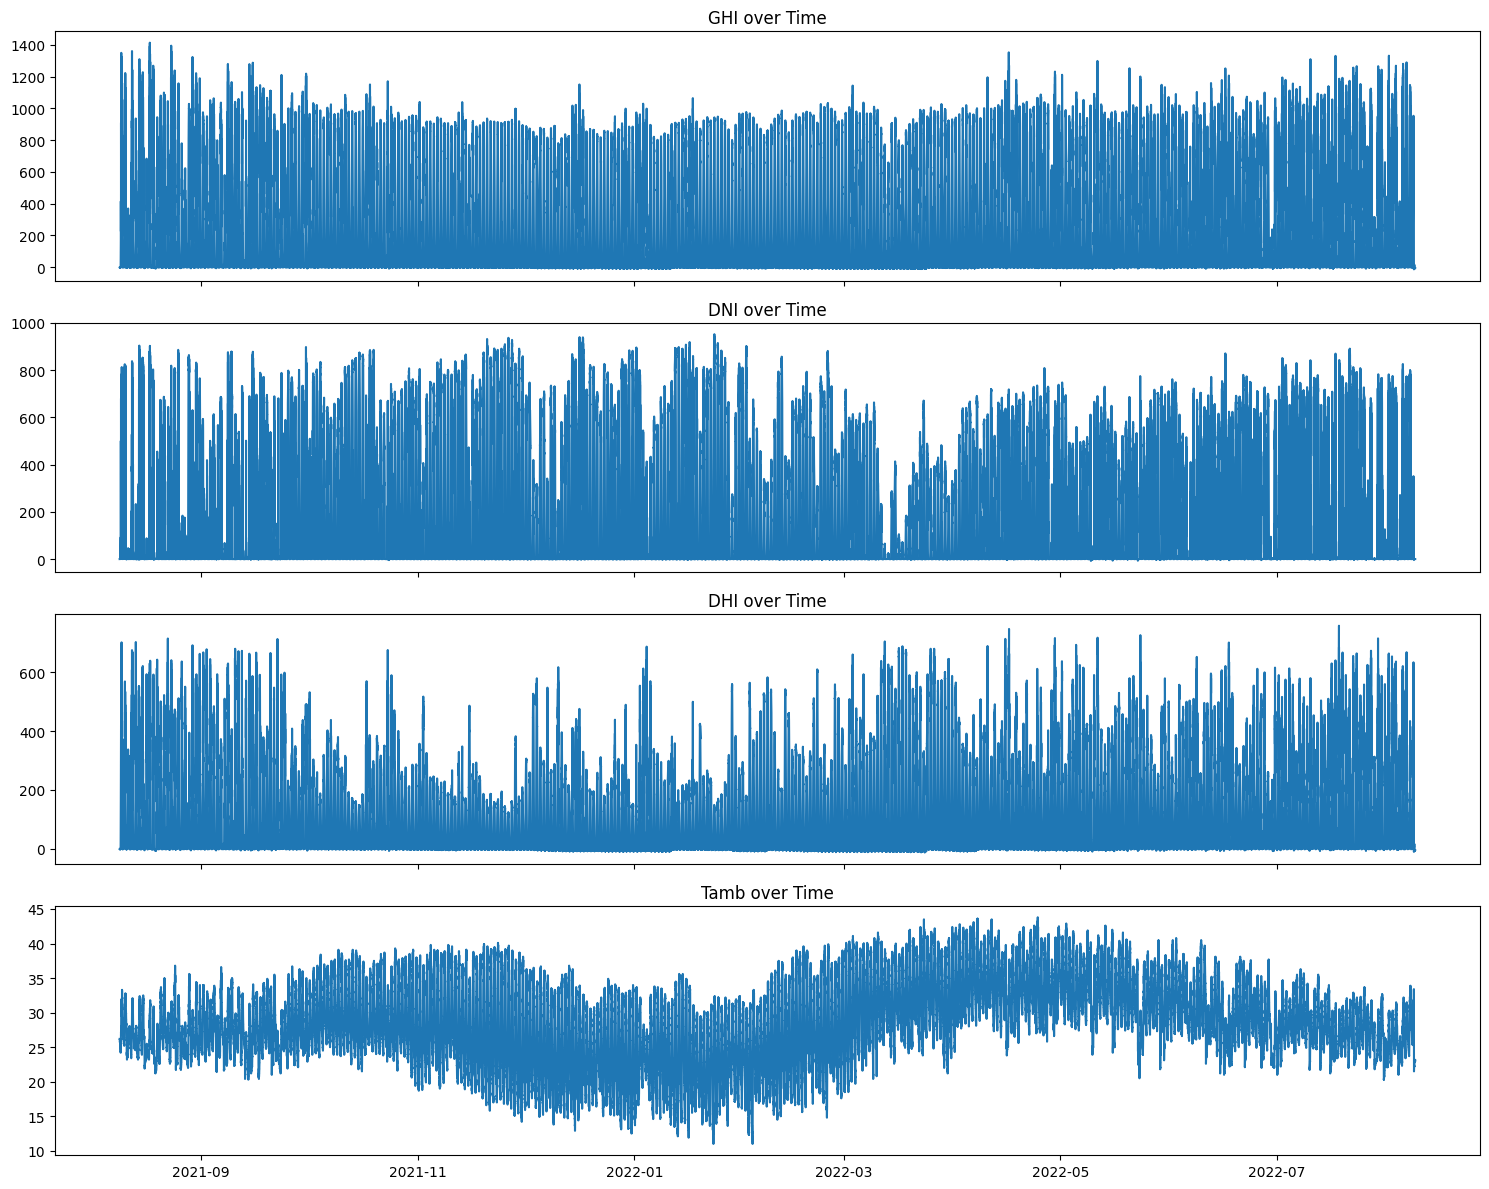

In [49]:
# Line plots for key variables
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb']):
    axs[i].plot(df_clean['Timestamp'], df_clean[col])
    axs[i].set_title(f'{col} over Time')
plt.tight_layout()
plt.show()

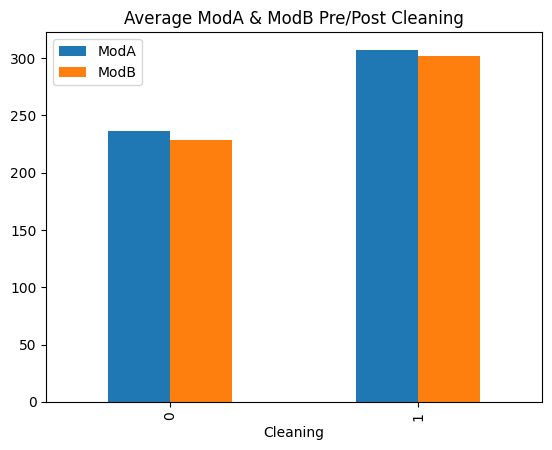

In [50]:
# Cleaning impact on ModA and ModB
if 'Cleaning' in df_clean.columns:
    df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
    plt.title('Average ModA & ModB Pre/Post Cleaning')
    plt.show()
